# Pietro e il Lupo: Introduzione al Reinforcement Learning

In questo tutorial, impareremo come applicare il Reinforcement Learning a un problema di ricerca del percorso. L'ambientazione è ispirata alla fiaba musicale [Pietro e il Lupo](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) del compositore russo [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). È la storia di un giovane pioniere, Pietro, che coraggiosamente esce di casa per andare nella radura della foresta a caccia di un lupo. Addestreremo algoritmi di apprendimento automatico che aiuteranno Pietro a esplorare l'area circostante e a costruire una mappa di navigazione ottimale.

Per prima cosa, importiamo una serie di librerie utili:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Panoramica dell'Apprendimento per Rinforzo

**Apprendimento per Rinforzo** (RL) è una tecnica di apprendimento che ci permette di apprendere un comportamento ottimale di un **agente** in un certo **ambiente** eseguendo molti esperimenti. Un agente in questo ambiente dovrebbe avere un **obiettivo**, definito da una **funzione di ricompensa**.

## L'Ambiente

Per semplicità, consideriamo il mondo di Peter come una scacchiera di dimensioni `width` x `height`. Ogni cella di questa scacchiera può essere:
* **terra**, su cui Peter e altre creature possono camminare
* **acqua**, su cui ovviamente non si può camminare
* **un albero** o **erba** - un luogo dove ci si può riposare
* **una mela**, che rappresenta qualcosa che Peter sarebbe felice di trovare per nutrirsi
* **un lupo**, che è pericoloso e dovrebbe essere evitato

Per lavorare con l'ambiente, definiremo una classe chiamata `Board`. Per non appesantire troppo questo notebook, abbiamo spostato tutto il codice per lavorare con la scacchiera in un modulo separato chiamato `rlboard`, che ora importeremo. Puoi guardare dentro questo modulo per ottenere maggiori dettagli sugli aspetti interni dell'implementazione.


Creiamo ora una scacchiera casuale e vediamo come appare:


In [4]:
# code block 1

## Azioni e Politica

Nel nostro esempio, l'obiettivo di Peter sarebbe trovare una mela, evitando il lupo e altri ostacoli. Definisci queste azioni come un dizionario e mappale a coppie di corrispondenti cambiamenti di coordinate.


In [5]:
# code block 2

La strategia del nostro agente (Peter) è definita da una cosiddetta **politica**. Consideriamo la politica più semplice chiamata **camminata casuale**.

## Camminata casuale

Iniziamo a risolvere il nostro problema implementando una strategia di camminata casuale.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funzione di Ricompensa

Per rendere la nostra politica più intelligente, dobbiamo capire quali mosse sono "migliori" rispetto ad altre.


In [8]:
#code block 5

## Q-Learning

Costruisci una Q-Table, o un array multidimensionale. Poiché il nostro tabellone ha dimensioni `width` x `height`, possiamo rappresentare la Q-Table con un array numpy di forma `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Passa la Q-Table alla funzione `plot` per visualizzare la tabella sulla scacchiera:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essenza del Q-Learning: Equazione di Bellman e Algoritmo di Apprendimento

Scrivi un pseudo-codice per il nostro algoritmo di apprendimento:

* Inizializza la Q-Table Q con numeri uguali per tutti gli stati e le azioni
* Imposta il tasso di apprendimento $\alpha\leftarrow 1$
* Ripeti la simulazione molte volte
   1. Inizia da una posizione casuale
   1. Ripeti
        1. Seleziona un'azione $a$ nello stato $s$
        2. Esegui l'azione spostandoti in un nuovo stato $s'$
        3. Se incontriamo una condizione di fine gioco o il totale della ricompensa è troppo basso - esci dalla simulazione  
        4. Calcola la ricompensa $r$ nel nuovo stato
        5. Aggiorna la Q-Function secondo l'equazione di Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Aggiorna la ricompensa totale e diminuisci $\alpha$.

## Sfruttare vs. Esplorare

Il miglior approccio è bilanciare tra esplorazione e sfruttamento. Man mano che impariamo di più sul nostro ambiente, saremo più propensi a seguire il percorso ottimale, tuttavia, scegliendo di tanto in tanto un percorso inesplorato.

## Implementazione in Python

Ora siamo pronti per implementare l'algoritmo di apprendimento. Prima di ciò, abbiamo anche bisogno di una funzione che converta numeri arbitrari nella Q-Table in un vettore di probabilità per le azioni corrispondenti:


In [10]:
# code block 7

Aggiungiamo una piccola quantità di `eps` al vettore originale per evitare la divisione per 0 nel caso iniziale, quando tutti i componenti del vettore sono identici.

L'algoritmo di apprendimento effettivo che eseguiremo per 5000 esperimenti, chiamati anche **epoche**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Dopo l'esecuzione di questo algoritmo, la Q-Table dovrebbe essere aggiornata con valori che definiscono l'attrattività delle diverse azioni a ogni passo. Visualizza la tabella qui:


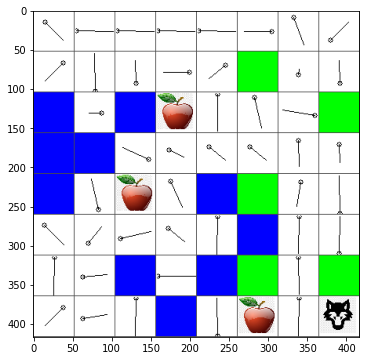

In [43]:
m.plot(Q)

## Verifica della Politica

Poiché la Q-Table elenca l'"attrattività" di ogni azione in ogni stato, è abbastanza semplice utilizzarla per definire la navigazione efficiente nel nostro mondo. Nel caso più semplice, possiamo semplicemente selezionare l'azione corrispondente al valore più alto nella Q-Table:


In [13]:
# code block 9

2

Se provi il codice sopra diverse volte, potresti notare che a volte si "blocca" e devi premere il pulsante STOP nel notebook per interromperlo.

> **Attività 1:** Modifica la funzione `walk` per limitare la lunghezza massima del percorso a un certo numero di passi (ad esempio, 100), e osserva come il codice sopra restituisce questo valore di tanto in tanto.

> **Attività 2:** Modifica la funzione `walk` in modo che non torni nei luoghi in cui è già stato in precedenza. Questo impedirà a `walk` di entrare in un ciclo, tuttavia, l'agente potrebbe comunque finire "intrappolato" in una posizione da cui non è in grado di uscire.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


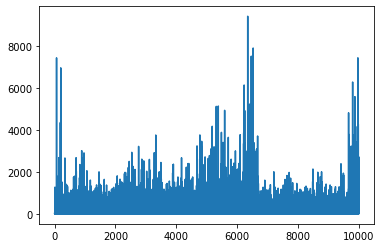

In [57]:
plt.plot(lpath)

## Esercizio
## Un mondo più realistico di Peter e il Lupo



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche possono contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale effettuata da un traduttore umano. Non siamo responsabili per eventuali incomprensioni o interpretazioni errate derivanti dall'uso di questa traduzione.
